<a href="https://colab.research.google.com/github/Quratulain05/Machine-Learning/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [12]:
IMAGE_SIZE = 256
BATCH_SIZE = 32



In [21]:
from google.colab import files
uploaded = files.upload()  # Upload the zip file

Saving PlantVillage.rar to PlantVillage.rar


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/MyDrive/PlantVillage"

Potato___Early_blight  Potato___healthy  Potato___Late_blight


In [37]:
import tensorflow as tf

# Define parameters
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS =50

# Load dataset - CORRECTED version
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantVillage',
    shuffle=True,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),  # Pass as simple tuple (h,w)
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [13]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
len(dataset)

68

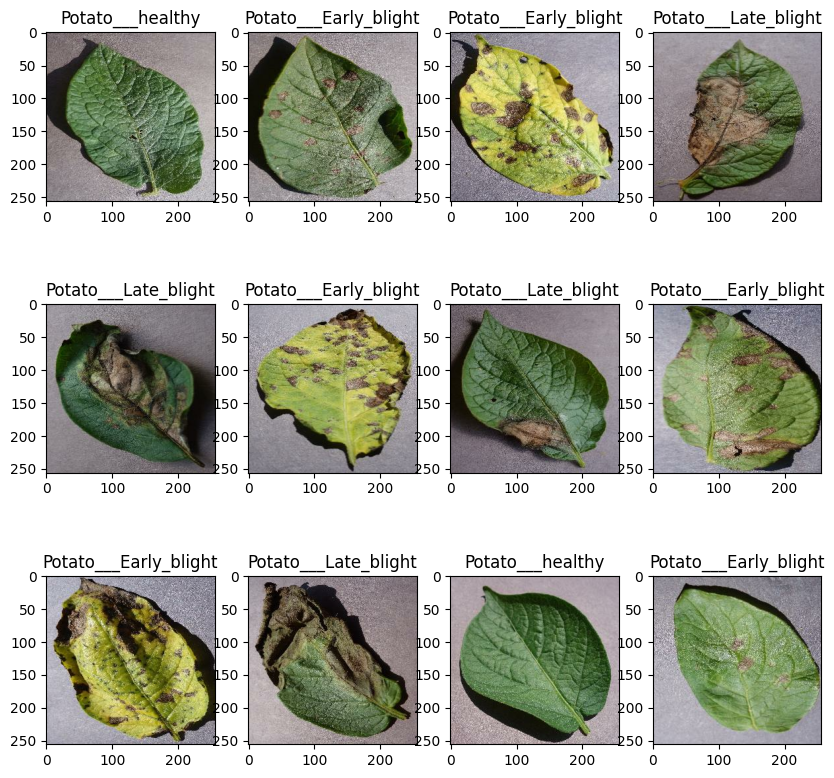

In [34]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
 for i in range (12):
  ax = plt.subplot(3, 4, i + 1) # creating subplot
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[label_batch[i]])



  # print(image_batch.shape) # (batch_size, height, width, channels RGB)
  # print(label_batch.numpy())

In [36]:
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test # 10% Validation → Used to tune hyperparameters during training 10% Test → Used only once for final evaluation (simulates real-world performance)

In [42]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [45]:
train_ds =dataset.take(54)
len(train_ds)

54

In [47]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [49]:
val_size =0.1
len(dataset)*val_size

6.800000000000001

In [51]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [53]:
test_ds= test_ds.skip(6)
len(test_ds)

2

In [55]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [57]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [59]:
len(train_ds)

54

In [61]:
len(val_ds)

6

In [63]:
len(test_ds)

8

In [65]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [69]:
import tensorflow as tf
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # No more .experimental
    layers.Rescaling(1.0/255)                # No more .experimental
])

In [72]:
import tensorflow as tf
from tensorflow.keras import layers

# Correct modern implementation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Fixed typo in mode name
    layers.RandomRotation(0.2)                    # 0.2 means 20% of 360° (72°)
])